## NBA Position Predictor Project

### Created 16 November 2021

## Initial Exploratory Data Analysis

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from get_stats import *

In [137]:
data = get_full_dataframe()

In [218]:
stats_df = data
stats_df

,RANK,NAME,TEAM,POS,AGE,GP,MPG,MIN%,USG%,TO%,...,TRB%,APG,AST%,SPG,BPG,TOPG,VI,ORTG,DRTG,Year
3,NaN,Al Horford,Bos,C,31.00,19,35.7,74.4,17.8,0.119,...,12.8,3.3,14.9,1.00,1.16,1.68,8.5,112.7,102.7,2017
4,NaN,Alec Burks,Uta,SG,26.00,9,13.4,27.9,28.9,0.103,...,11.2,1.9,25.9,0.44,0.11,0.89,10.7,110.0,101.1,2017
5,NaN,Alex Abrines,Okc,SG,24.00,6,18.3,38.2,8.5,0.046,...,7.5,0.3,2.4,0.83,0.33,0.17,3.2,119.8,102.0,2017
6,NaN,Al-Farouq Aminu,Por,SF,27.00,4,32.7,68.2,19.7,0.102,...,15.0,1.3,6.2,1.00,0.50,1.50,7.2,126.2,112.7,2017
7,NaN,Amir Johnson,Phi,PF,30.00,8,11.7,24.4,11.9,0.115,...,13.2,1.1,13.3,0.25,0.13,0.38,7.5,122.7,100.4,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,NaN,Charlie Brown Jr.,Phi,G,23.93,1,12.4,25.8,12.5,29.100,...,13.3,1.0,11.0,2.00,1.00,1.00,6.7,110.9,96.3,2021
1476,NaN,Langston Galloway,Mil,G,30.08,1,20.4,42.5,12.6,0.000,...,7.7,4.0,24.6,1.00,0.00,0.00,5.7,81.8,112.5,2021
1479,NaN,Danuel House Jr.,Uta,F-G,28.59,1,25.8,53.8,14.8,11.300,...,8.3,4.0,21.9,0.00,1.00,1.00,9.2,161.3,105.4,2021
1481,NaN,Greg Monroe,Was,F-C,31.60,1,14.1,29.4,22.1,0.000,...,27.1,1.0,13.0,1.00,1.00,0.00,10.9,140.5,102.7,2021


In [203]:
#test
[(i, list(set(stats_df[stats_df['Year'] == i]['POS']))) for i in range(2017, 2022)]

[(2017, ['PG', 'G', 'SG', 'SF', 'C', 'PF']),
 (2018, ['G', 'G-F', 'F-C', 'F-G', 'C-F', 'F', 'C']),
 (2019, ['G', 'G-F', 'F-C', 'F-G', 'C-F', 'F', 'C']),
 (2020, ['G', 'G-F', 'F-C', 'F-G', 'C-F', 'F', 'C']),
 (2021, ['G', 'G-F', 'F-C', 'F-G', 'C-F', 'F', 'C'])]

In [219]:
stats_df = stats_df[stats_df['Year'] != 2017]
stats_df

,RANK,NAME,TEAM,POS,AGE,GP,MPG,MIN%,USG%,TO%,...,TRB%,APG,AST%,SPG,BPG,TOPG,VI,ORTG,DRTG,Year
209,NaN,Marc Gasol,Tor,C,34.37,24,30.6,63.8,13.6,9.5,...,11.5,3.0,14.7,0.88,1.08,0.88,7.4,118.4,97.2,2018
210,NaN,Danny Green,Tor,G-F,31.98,24,28.5,59.4,12.6,13.6,...,7.0,1.1,5.4,1.29,0.46,1.08,4.2,97.4,101.6,2018
211,NaN,Serge Ibaka,Tor,F-C,29.74,24,20.8,43.4,21.4,10.6,...,15.8,0.9,7.4,0.46,0.96,1.04,7.1,105.5,91.9,2018
212,NaN,Kawhi Leonard,Tor,F,27.96,24,39.1,81.6,32.0,11.1,...,12.8,3.9,19.3,1.67,0.71,3.08,10.5,118.9,102.7,2018
213,NaN,Kyle Lowry,Tor,G,33.22,24,37.5,78.2,18.4,14.5,...,7.2,6.6,27.5,1.29,0.29,2.21,8.4,116.8,100.1,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,NaN,Charlie Brown Jr.,Phi,G,23.93,1,12.4,25.8,12.5,29.1,...,13.3,1.0,11.0,2.00,1.00,1.00,6.7,110.9,96.3,2021
1476,NaN,Langston Galloway,Mil,G,30.08,1,20.4,42.5,12.6,0.0,...,7.7,4.0,24.6,1.00,0.00,0.00,5.7,81.8,112.5,2021
1479,NaN,Danuel House Jr.,Uta,F-G,28.59,1,25.8,53.8,14.8,11.3,...,8.3,4.0,21.9,0.00,1.00,1.00,9.2,161.3,105.4,2021
1481,NaN,Greg Monroe,Was,F-C,31.60,1,14.1,29.4,22.1,0.0,...,27.1,1.0,13.0,1.00,1.00,0.00,10.9,140.5,102.7,2021


In [230]:
# replace positions to get two different player classifications:
# - POS3 = {"G", "F", "C"}
# - POS5 = {"G", "GF", "F", "FC", "C"}
stats_df.loc[:, "POS3"] = stats_df["POS"].replace("G-F", "G").replace("F-G", "F").replace("C-F", "C").replace("F-C", "F")
stats_df.loc[:, "POS5"] = stats_df["POS"].replace("G-F", "GF").replace("F-G", "GF").replace("C-F", "FC").replace("F-C", "FC")


In [231]:
stats_df

,RANK,NAME,TEAM,POS,AGE,GP,MPG,MIN%,USG%,TO%,...,AST%,SPG,BPG,TOPG,VI,ORTG,DRTG,Year,POS3,POS5
209,NaN,Marc Gasol,Tor,C,34.37,24,30.6,63.8,13.6,9.5,...,14.7,0.88,1.08,0.88,7.4,118.4,97.2,2018,C,C
210,NaN,Danny Green,Tor,G-F,31.98,24,28.5,59.4,12.6,13.6,...,5.4,1.29,0.46,1.08,4.2,97.4,101.6,2018,G,GF
211,NaN,Serge Ibaka,Tor,F-C,29.74,24,20.8,43.4,21.4,10.6,...,7.4,0.46,0.96,1.04,7.1,105.5,91.9,2018,F,FC
212,NaN,Kawhi Leonard,Tor,F,27.96,24,39.1,81.6,32.0,11.1,...,19.3,1.67,0.71,3.08,10.5,118.9,102.7,2018,F,F
213,NaN,Kyle Lowry,Tor,G,33.22,24,37.5,78.2,18.4,14.5,...,27.5,1.29,0.29,2.21,8.4,116.8,100.1,2018,G,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,NaN,Charlie Brown Jr.,Phi,G,23.93,1,12.4,25.8,12.5,29.1,...,11.0,2.00,1.00,1.00,6.7,110.9,96.3,2021,G,G
1476,NaN,Langston Galloway,Mil,G,30.08,1,20.4,42.5,12.6,0.0,...,24.6,1.00,0.00,0.00,5.7,81.8,112.5,2021,G,G
1479,NaN,Danuel House Jr.,Uta,F-G,28.59,1,25.8,53.8,14.8,11.3,...,21.9,0.00,1.00,1.00,9.2,161.3,105.4,2021,F,GF
1481,NaN,Greg Monroe,Was,F-C,31.60,1,14.1,29.4,22.1,0.0,...,13.0,1.00,1.00,0.00,10.9,140.5,102.7,2021,F,FC


In [236]:
print(stats_df.groupby('POS3')['POS3'].count())
print(stats_df.groupby('POS5')['POS5'].count())

POS3
C    135
F    443
G    541
Name: POS3, dtype: int64
POS5
C      92
F     323
FC    116
G     436
GF    152
Name: POS5, dtype: int64


In [167]:
stats_df['POS'].isin(["F", "G"])

209     False
210     False
211     False
212      True
213      True
        ...  
1474     True
1476     True
1479    False
1481    False
1483     True
Name: POS, Length: 1119, dtype: bool

In [237]:
stats_df.describe()

,RANK,AGE,GP,MPG,MIN%,USG%,TO%,FTA,FT%,2PA,...,TRB%,APG,AST%,SPG,BPG,TOPG,VI,ORTG,DRTG,Year
count,0.0,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,...,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000
mean,NaN,27.145684,15.385165,20.890706,43.514209,18.601698,11.737176,32.046470,0.683980,77.468275,...,10.063181,1.945398,12.952636,0.630143,0.402449,1.105362,6.430652,108.142627,103.501519,2019.994638
std,NaN,4.228616,11.677272,10.426562,21.726436,6.318498,6.850110,43.708168,0.278666,95.552618,...,5.124844,1.965597,10.111697,0.484130,0.443337,0.949610,2.875244,21.968768,6.447134,1.148215
min,NaN,19.040000,1.000000,4.000000,8.300000,4.400000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000,2018.000000
25%,NaN,23.680000,5.000000,11.600000,24.200000,14.100000,7.800000,4.000000,0.603000,12.000000,...,6.400000,0.600000,6.300000,0.260000,0.090000,0.430000,5.100000,99.500000,100.000000,2019.000000
50%,NaN,26.820000,12.000000,20.500000,42.800000,17.700000,11.200000,15.000000,0.760000,37.000000,...,9.000000,1.300000,10.300000,0.520000,0.290000,0.830000,6.500000,109.900000,103.900000,2020.000000
75%,NaN,30.070000,25.000000,30.000000,62.500000,22.300000,14.850000,41.000000,0.857000,106.000000,...,12.800000,2.600000,17.850000,0.940000,0.550000,1.500000,8.000000,118.650000,107.700000,2021.000000
max,NaN,41.580000,41.000000,41.300000,86.100000,48.100000,50.000000,329.000000,1.000000,572.000000,...,40.100000,11.800000,76.900000,3.000000,4.000000,5.170000,17.400000,280.100000,123.300000,2021.000000


In [238]:
stats_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1119 entries, 209 to 1483
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RANK    0 non-null      float64
 1   NAME    1119 non-null   object 
 2   TEAM    1119 non-null   object 
 3   POS     1119 non-null   object 
 4   AGE     1119 non-null   float64
 5   GP      1119 non-null   int64  
 6   MPG     1119 non-null   float64
 7   MIN%    1119 non-null   float64
 8   USG%    1119 non-null   float64
 9   TO%     1119 non-null   float64
 10  FTA     1119 non-null   int64  
 11  FT%     1119 non-null   float64
 12  2PA     1119 non-null   int64  
 13  2P%     1119 non-null   float64
 14  3PA     1119 non-null   int64  
 15  3P%     1119 non-null   float64
 16  eFG%    1119 non-null   float64
 17  TS%     1119 non-null   float64
 18  PPG     1119 non-null   float64
 19  RPG     1119 non-null   float64
 20  TRB%    1119 non-null   float64
 21  APG     1119 non-null   float64
 22

In [239]:
#divide the data into the input 'X' and the labels 'y'
X        = stats_df[['MIN%', 'USG%', 'TO%', 'FTA', 'FT%', '2PA', '2P%', '3PA', '3P%', 'eFG%', 'TS%', 'PPG',
                     'RPG', 'TRB%','APG', 'AST%', 'SPG', 'BPG', 'TOPG', 'VI', 'ORTG', 'DRTG']] #the observations
y        = stats_df['POS3'] #the label

In [240]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=6, stratify = y)
# Enter appropriate values to partition data, and ensure results are reproducible and obtain stratified samples

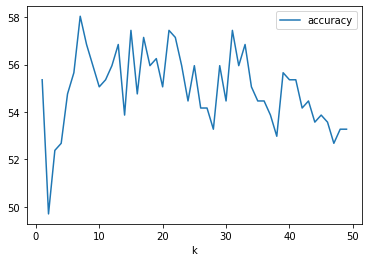

In [241]:
k = []
accuracy = []
# build the k-nn model, experiment with different values of k and plot the results
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    k.append(i)
    accuracy.append(knn.score(X_test, y_test)*100)
    # print(knn.predict(X_test))
    # print('The accuracy of the model is {}'.format(knn.score(X_test, y_test)))
    
    
acc = pd.DataFrame({'k': k, 'accuracy': accuracy})
lines = acc.plot.line(x = 'k')

In [242]:
knn = KNeighborsClassifier(n_neighbors=7) 
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           C       0.64      0.34      0.44        41
           F       0.48      0.57      0.52       133
           G       0.67      0.65      0.66       162

    accuracy                           0.58       336
   macro avg       0.60      0.52      0.54       336
weighted avg       0.59      0.58      0.58       336



In [178]:
knn = KNeighborsClassifier(n_neighbors=9) 
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           C       0.50      0.37      0.43        27
           F       0.36      0.54      0.43        97
          FC       0.33      0.17      0.23        35
           G       0.59      0.62      0.60       131
          GF       0.35      0.13      0.19        46

    accuracy                           0.46       336
   macro avg       0.43      0.37      0.38       336
weighted avg       0.46      0.46      0.44       336

